#House Prices - Advanced Regression Techniques

## 1. Định nghĩa vấn đề (Define Problem)
+ **Mô tả**:
  + Bộ dữ liệu bao gồm:
    + Tập train 1460 dòng và 81 cột.
    + Tập test 1459 dòng và 80 cột.
  + Nhiệm vụ là dự đoán giá bán của các căn nhà ở Ames, Iowa, dựa trên các đặc trưng mô tả ngôi nhà (diện tích, năm xây, chất lượng, vị trí, v.v…).
  + Đây là bài toán hồi quy (Regression problem)
+ **Dữ liệu đầu vào**:
  + OverallQual: Chất lượng tổng thể của ngôi nhà (thang điểm 1–10).
  + GrLivArea: Diện tích sinh hoạt chính (tính theo feet vuông).
  + YearBuilt: Năm xây dựng.
  + GarageCars: Số lượng chỗ đỗ xe trong gara.
  + TotalBsmtSF: Tổng diện tích tầng hầm.
  + Neighborhood: Khu phố nơi ngôi nhà tọa lạc.
  + LotArea: Diện tích khu đất.
  + BsmtQual, KitchenQual, Exterior1st, SaleType, … (và nhiều đặc trưng khác).
+ **Kết quả**:
  + SalePrice: Giá bán của căn nhà (giá trị liên tục, đơn vị USD).

## 2. Chuẩn bị vấn đề (Prepare Problem)

### 2.1. Khai báo thư viện (Load Libraries)

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2. Nạp dữ liệu (Load Dataset)

In [76]:
train = pd.read_csv('/content/drive/MyDrive/data/predict_house/train.csv')
test = pd.read_csv('/content/drive/MyDrive/data/predict_house/test.csv')

## 3. Phân tích dữ liệu (EDA)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu.
+ Kiểu dữ liệu của từng cột.
+ 5 dòng đầu của bảng dữ liệu.
+ Thông tin chung của dữ liệu.

In [77]:
print(f'+ Shape of train: {train.shape}')
print(f'\n+ Data Types: \n{train.dtypes}\n\n')

print(f'+ 5 dòng đầu của dữ liệu: \n\n{train.head()}')
train.head()

print(f' Thông tin dữ liệu')
train.info()

+ Shape of train: (1460, 81)

+ Data Types: 
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


+ 5 dòng đầu của dữ liệu: 

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    

**Nhận Xét:**
+ Bộ dữ liệu có 1460 dòng và 81 cột.
+ Các dữ liệu bị thiếu như PoolQC, MiscFeature FireplaceQu,...

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu.**

In [78]:
duplicates = train[train.duplicated()]
print("Số dòng trùng lặp:", duplicates.shape[0])
if not duplicates.empty:
    print("Các dòng bị trùng lặp:")
    print(duplicates)

# 2. Kiểm tra Null
null_rows = train[train.isnull().any(axis=1)]
print("\nSố dòng có giá trị Null:", null_rows.shape[0])
if not null_rows.empty:
    print("Các dòng có giá trị Null:")
    print(null_rows)

# 3. Kiểm tra NaN (NaN cũng được Pandas xem như null, nhưng kiểm tra riêng nếu muốn chắc chắn)
nan_rows = train[train.isna().any(axis=1)]
print("\nSố dòng có giá trị NaN:", nan_rows.shape[0])
if not nan_rows.empty:
    print("Các dòng có giá trị NaN:")
    print(nan_rows)

Số dòng trùng lặp: 0

Số dòng có giá trị Null: 1460
Các dòng có giá trị Null:
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937

**Nhận Xét:**
+ Không có dòng trùng lặp.
+ Có đến 1460 dòng dữ liệu NaN.

#### (3) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [79]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [80]:
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [81]:
missing_percent = (train.isnull().sum() / len(train))
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64


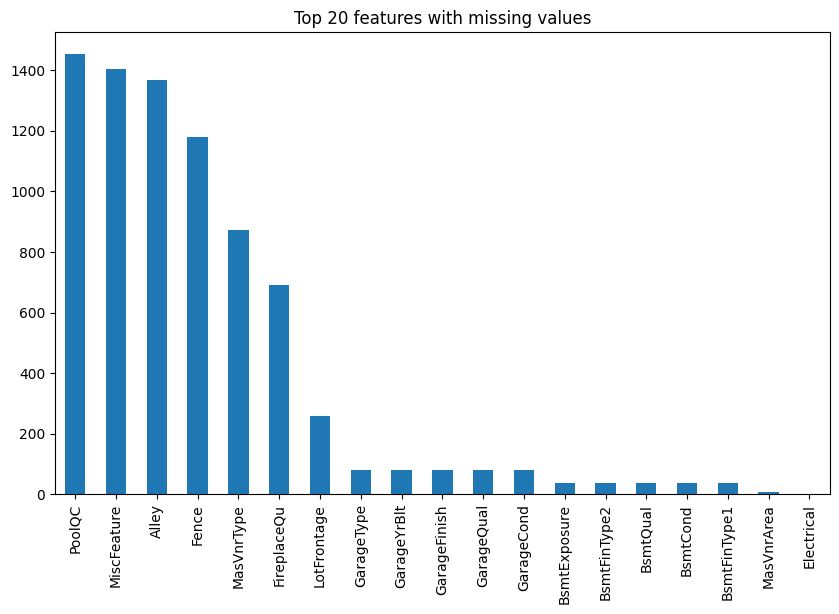

In [82]:
plt.figure(figsize=(10,6))
missing[:20].plot(kind='bar')
plt.title('Top 20 features with missing values')
plt.show()

**Nhận Xét:**
+ Đa số dữ liệu bị thiếu khá nhiều gần như 100% dữ liệu bị thiếu ở một số cột như PoolQC, MiscFeature, Alley.

In [83]:
# Bỏ cột ID
test_ids = test['Id']
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [84]:
num_cols = train.select_dtypes(include=['int64', 'float64']).columns
corr = train[num_cols].corr()['SalePrice'].sort_values(ascending=False)
corr[:5]

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431


#### (4) **Mối tương quan giữa các tính chất (Correlations)**

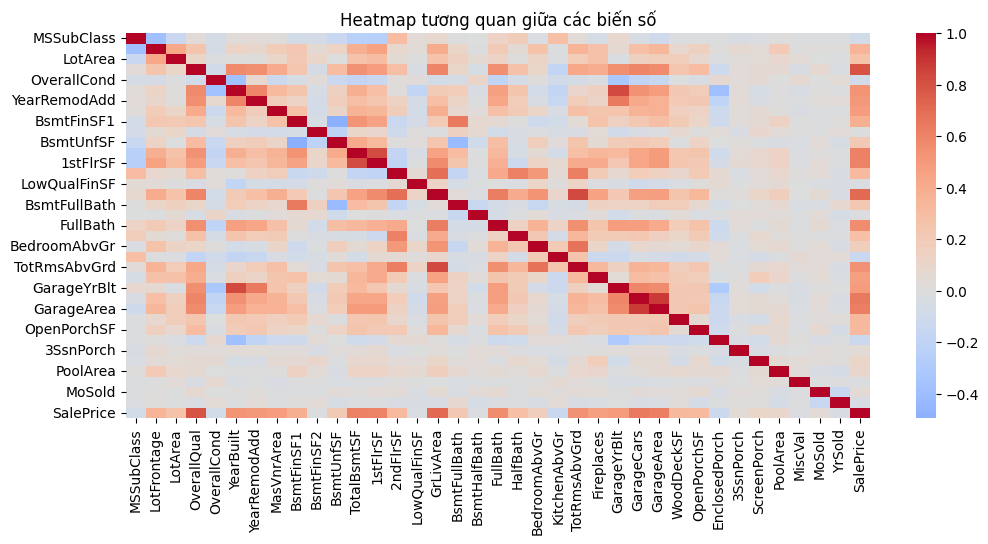

In [85]:
plt.figure(figsize=(12,5))
sns.heatmap(train[num_cols].corr(), cmap='coolwarm', center=0)
plt.title('Heatmap tương quan giữa các biến số')
plt.show()

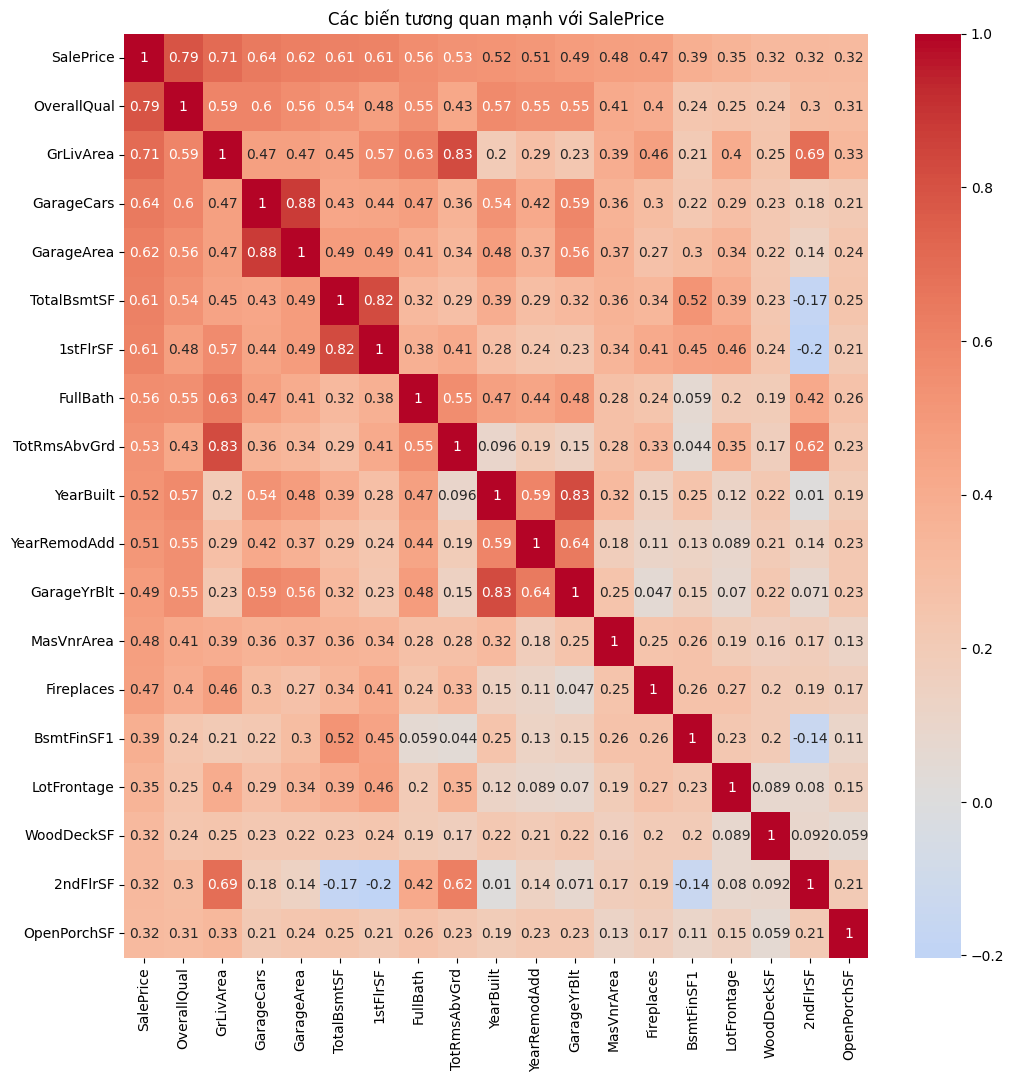

In [86]:
plt.figure(figsize=(12, 12))
corr = train[num_cols].corr()
corr_target = corr['SalePrice'].abs().sort_values(ascending=False)
top_features = corr_target[corr_target > 0.3].index  # chỉ lấy những biến tương quan > 0.3
sns.heatmap(train[top_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Các biến tương quan mạnh với SalePrice')
plt.show()

**Nhận Xét:**
+ Các cặp tương quan cao:
  + SalePrice và OverallQual.
  + YearBuilt và GarageYrBlt.
  + GarageArea và SalePrice.
  + SalePrice và GarageCars.
  + SalePrice và KitchenAbvGr.
  + SalePrice và LotArea.
  + ...


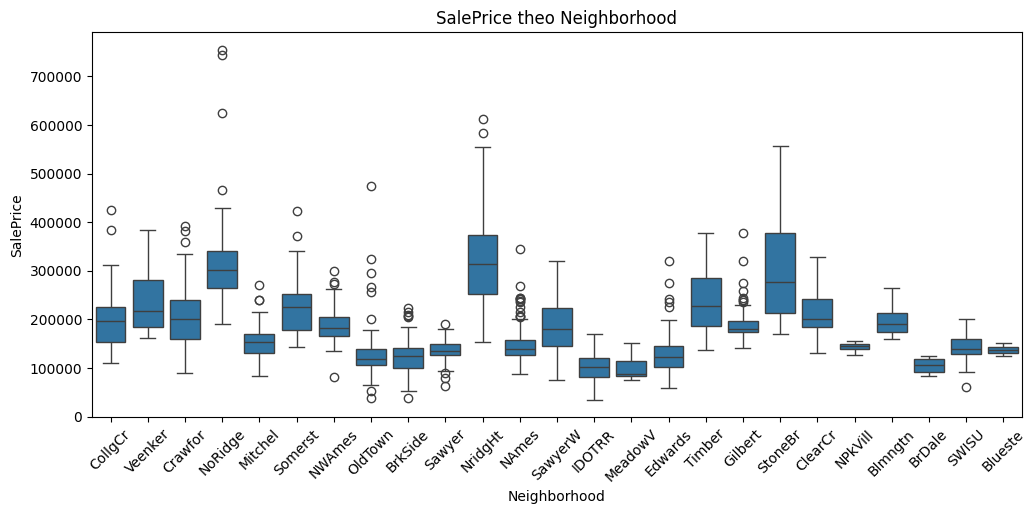

In [87]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train)
plt.xticks(rotation=45)
plt.title('SalePrice theo Neighborhood')
plt.show()

**Nhận Xét:**
+ SalePrice và Neighborhood:
  + Khu có giá nhà cao: NoRidge (Có một số ít Outliers), NridgHt, StoneBr.
  + Khu có giá trị thấp: Mitchel, OldTown, BrkSide, ...

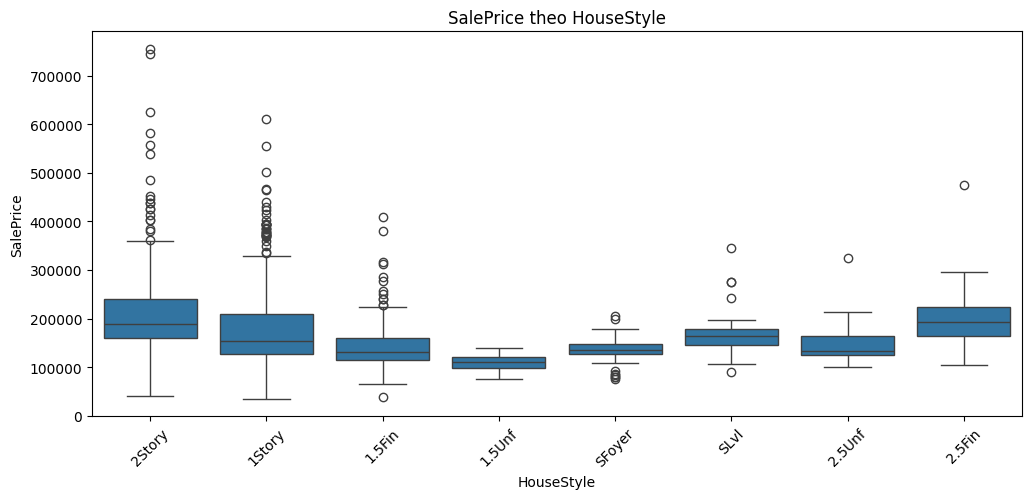

In [88]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='HouseStyle', y='SalePrice', data=train)
plt.xticks(rotation=45)
plt.title('SalePrice theo HouseStyle')
plt.show()

**Nhận Xét:**
+ Các loại nhà giá cao như 2Story, 1Story, 2.5Fin.
+ Các outlier xảy ra ở 2Story, 1Story.

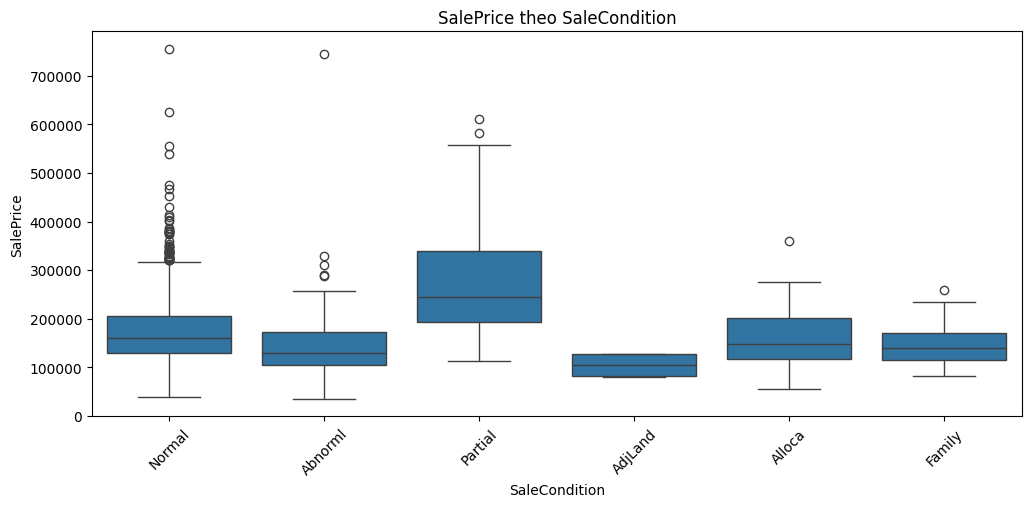

In [89]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='SaleCondition', y='SalePrice', data=train)
plt.xticks(rotation=45)
plt.title('SalePrice theo SaleCondition')
plt.show()

**Nhận xét:**
+ Điều kiện Normal: Giá trung bình cao nhất.
+ Các trường hợp bán bất thường như Abnorml, Family hoặc Partial thường có giá thấp hơn đáng kể, cho thấy điều kiện giao dịch là yếu tố ảnh hưởng quan trọng đến giá bán (SalePrice).

/tmp/ipython-input-3488584266.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Neighborhood', y='SalePrice', hue='SaleCondition', data=train, palette='Set2', ci=None)


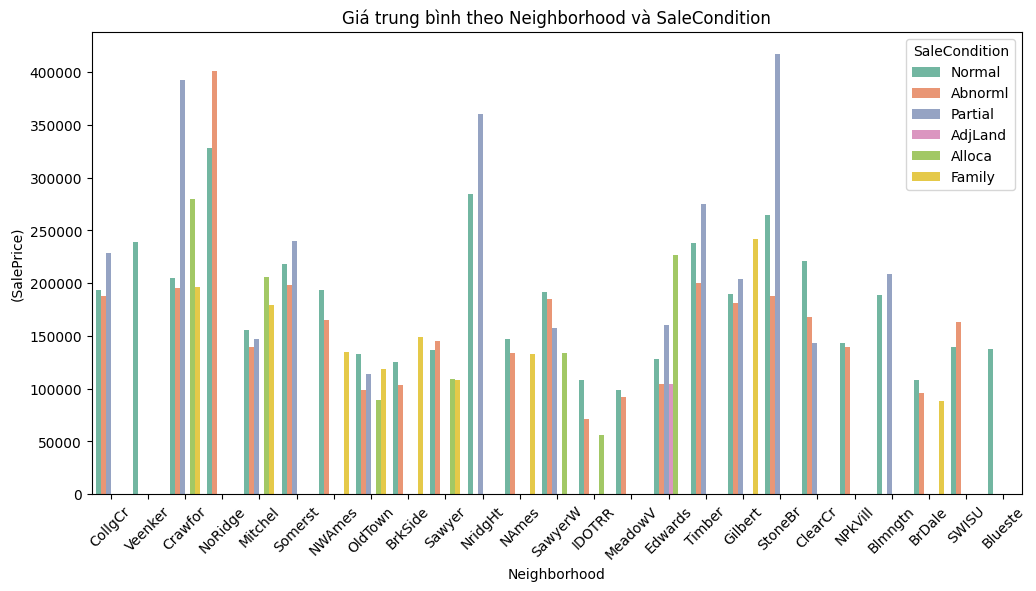

In [90]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Neighborhood', y='SalePrice', hue='SaleCondition', data=train, palette='Set2', ci=None)
plt.xticks(rotation=45)
plt.title('Giá trung bình theo Neighborhood và SaleCondition')
plt.xlabel('Neighborhood')
plt.ylabel('(SalePrice)')
plt.legend(title='SaleCondition')
plt.show()


**Nhận xét:**
+ Tùy thuộc vào từng địa điểm và điều kiện căn nhà thì sẽ có giá khác nhau.
+ Như khu StoneBr với điều kiện Normal giá cao hơn so với khu CollgCr cùng với điều kiện đó
=> Cho thấy đây là 2 biến ảnh hưởng mạnh đến giá nhà.

## 4. Chuẩn bị dữ liệu (Prepare Data)

### (1) **Tạo bảng dữ liệu làm sạch**

In [91]:
train_cp = train.copy()

### (2) **Xử lí giá trị bị thiếu.**

+ Loại bỏ những cột bị thiếu trên 50% dữ liệu

In [92]:
missing = train_cp.isnull().sum() / len(train)
cols_to_drop = missing[missing > 0.5].index
train_cp = train_cp.drop(cols_to_drop, axis=1)

In [93]:
missing = train_cp.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageFinish     81
GarageType       81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtCond         37
BsmtQual         37
BsmtFinType1     37
MasVnrArea        8
Electrical        1
dtype: int64


In [94]:
num_cols = train_cp.select_dtypes(include=['int64', 'float64']).columns
train_cp[num_cols].isnull().sum().sort_values(ascending=False).head(10)

,0
LotFrontage,259
GarageYrBlt,81
MasVnrArea,8
MSSubClass,0
LotArea,0
OverallCond,0
OverallQual,0
YearRemodAdd,0
YearBuilt,0
BsmtFinSF2,0


In [95]:
# Điền median cho tất cả cột số có giá trị thiếu
for col in num_cols:
    if train_cp[col].isnull().sum() > 0:
        median_value = train_cp[col].median()
        train_cp[col] = train_cp[col].fillna(median_value)

In [96]:
cat_cols = train_cp.select_dtypes(include=['object','category']).columns
train_cp[cat_cols].isnull().sum().sort_values(ascending=False).head(20)

,0
FireplaceQu,690
GarageFinish,81
GarageType,81
GarageQual,81
GarageCond,81
BsmtExposure,38
BsmtFinType2,38
BsmtFinType1,37
BsmtCond,37
BsmtQual,37


In [97]:
cols_fill_none = [
    'FireplaceQu', 'GarageFinish', 'GarageType', 'GarageQual', 'GarageCond',
    'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'
]

for col in cols_fill_none:
    train_cp[col] = train_cp[col].fillna('None')


In [98]:
train_cp['Electrical'] = train_cp['Electrical'].fillna(train_cp['Electrical'].mode()[0])


#### Test

In [99]:
missing = test.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageQual        78
GarageCond        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
Functional         2
BsmtFullBath       2
Utilities          2
BsmtHalfBath       2
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
GarageArea         1
GarageCars         1
SaleType           1
dtype: int64


In [100]:
missing = test.isnull().sum() / len(test)
cols_to_drop = missing[missing > 0.5].index
test = test.drop(cols_to_drop, axis=1)

print("Các cột bị loại bỏ trong test:", list(cols_to_drop))

Các cột bị loại bỏ trong test: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [102]:
num_cols_test = test.select_dtypes(include=['int64', 'float64']).columns
test[num_cols_test].isnull().sum().sort_values(ascending=False).head(20)

,0
LotFrontage,227
GarageYrBlt,78
MasVnrArea,15
BsmtFullBath,2
BsmtHalfBath,2
GarageCars,1
BsmtFinSF2,1
GarageArea,1
TotalBsmtSF,1
BsmtFinSF1,1


In [103]:
for col in num_cols_test:
    if test[col].isnull().sum() > 0:
        median_value = test[col].median()
        test[col] = test[col].fillna(median_value)

In [104]:
cat_cols_test = test.select_dtypes(include=['object', 'category']).columns
test[cat_cols_test].isnull().sum().sort_values(ascending=False).head(20)

,0
GarageCond,78
GarageQual,78
GarageFinish,78
GarageType,76
BsmtCond,45
BsmtExposure,44
BsmtQual,44
BsmtFinType2,42
BsmtFinType1,42
MSZoning,4


In [105]:
cols_fill_none_test = [
    'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
    'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1'
]

for col in cols_fill_none_test:
    test[col] = test[col].fillna('None')

In [106]:
cols_fill_mode_test = [
    'MSZoning', 'Functional', 'Utilities',
    'Exterior1st', 'Exterior2nd', 'SaleType', 'KitchenQual'
]

for col in cols_fill_mode_test:
    test[col] = test[col].fillna(test[col].mode()[0])

## 5. Train

In [107]:
y = train_cp['SalePrice']
X = train_cp.drop(columns=['SalePrice'])

In [108]:
X = pd.get_dummies(X)
test = pd.get_dummies(test)

# Đồng bộ cột giữa train và test
X, test = X.align(test, join='left', axis=1, fill_value=0)

In [109]:
X = X.fillna(0)
test = test.fillna(0)

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test)

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# ====== 1️⃣ Loại bỏ hoặc điền giá trị thiếu ======
imputer = SimpleImputer(strategy='median')  # hoặc 'most_frequent' nếu muốn
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# ====== 2️⃣ Chuẩn hóa dữ liệu (scale về cùng độ lớn) ======
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

# ====== 3️⃣ Chia train/test ======
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ====== 4️⃣ Huấn luyện mô hình Linear Regression ======
model = LinearRegression()
model.fit(X_train, y_train)

# ====== 5️⃣ Dự đoán và đánh giá ======
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("✅ RMSE:", rmse)

✅ RMSE: 28572.56299869256


In [112]:
predictions = model.predict(test_scaled)
output = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': predictions
})
output.to_csv('submission_v2_1.csv', index=False)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##